In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from joblib import Parallel, delayed

In [2]:
def run_sim(x):
    truth = np.random.uniform(size=100) < x
    first_random = np.random.randint(2,size=100)
    second_random = np.random.randint(2,size=100)
    res = np.sum(first_random*truth + (1-first_random)*second_random)/100
    return res

In [3]:
def sample(data = 0.54):
    x = np.random.uniform()
    if run_sim(x) == data:
        return x

In [4]:
t = Parallel(n_jobs=-1)(delayed(sample)() for i in range(100000))
t = np.array(t,dtype=float)
share = np.sum(np.isnan(t))/len(t)*100
print(f'{share:.2f}% are throwaways')

98.01% are throwaways


In [5]:
t_flat = t[~np.isnan(t)]

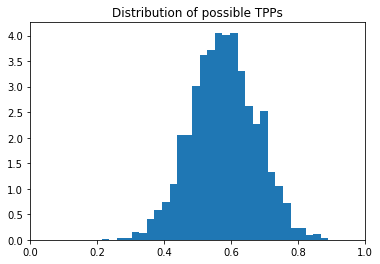

In [6]:
plt.hist(t_flat, bins=30,density=True)
plt.title('Distribution of possible TPPs')
plt.xlim(0,1);

In [7]:
def sample(data = 0.54):
    x = np.random.uniform(low=0,high=0.5)
    if run_sim(x) == data:
        return x

Now you can run the simulations exactly as before.

In [8]:
t = Parallel(n_jobs=-1)(delayed(sample)() for i in range(100000))
t = np.array(t,dtype=float)

In [9]:
# Optional
share = np.sum(np.isnan(t))/len(t)*100
print(f'{share:.2f}% are throwaways')

99.10% are throwaways


In [10]:
t_cut = t[~np.isnan(t)]

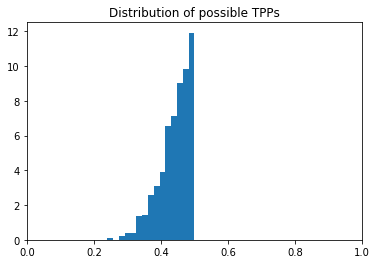

In [12]:
plt.hist(t_cut, bins=15,density=True)
plt.title('Distribution of possible TPPs')
plt.xlim(0,1);

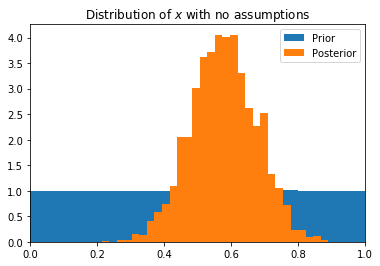

In [13]:
flat_prior = np.random.uniform(size=1000000)
plt.hist(flat_prior,bins=10,density=True, label='Prior')
plt.hist(t_flat, bins=30,density=True, label='Posterior')
plt.title('Distribution of $x$ with no assumptions')
plt.legend()
plt.xlim(0,1);

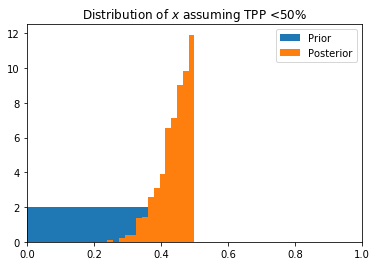

In [14]:
cut_prior = np.random.uniform(low=0,high=0.5,size=1000000)
plt.hist(cut_prior,bins=10,density=True, label='Prior')
plt.hist(t_cut, bins=15,density=True, label='Posterior')
plt.title('Distribution of $x$ assuming TPP <50%')
plt.legend()
plt.xlim(0,1);